Exploratory data analysis and Feature enginerring on the last stage to model building and training

In [1]:
# Importing necessary lebraries
import numpy as np
import pandas as pd
import os
import sys
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import plotly.io as pio
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
sys.path.append(os.path.join(os.path.abspath('..')))

In [30]:
# Import modules
from src import data_loading as dl
from src import data_summarry as ds
from src import formatting as fm
from src import univariate_analysis as uv
from src.utils import *
from scripts.feature_engineering import *

In [31]:
# Load the data set 
fraud_data_with_country = dl.load_data("processed/fraud_data_with_country.csv") # Includes e-commerce transaction data aimed at identifying fraudulent activities.
credit_card= dl.load_data("processed/creditcard_processed.csv") # Maps IP addresses to countries

In [32]:
# Converting date column to datetime format 
fraud_data_with_country['signup_time'] = pd.to_datetime(fraud_data_with_country['signup_time'])
fraud_data_with_country['purchase_time'] = pd.to_datetime(fraud_data_with_country['purchase_time'])

In [33]:
# Call the function with your DataFrame and datetime columns
datetime_columns = ['signup_time', 'purchase_time']
fraud_data_with_country = extract_datetime_features(fraud_data_with_country, datetime_columns)

In [34]:
fraud_data_with_country.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'ip_address_int', 'country', 'signup_time_hour', 'signup_time_day',
       'signup_time_year', 'signup_time_month', 'purchase_time_hour',
       'purchase_time_day', 'purchase_time_year', 'purchase_time_month'],
      dtype='object')

In [35]:
# Perform feature engineering
fraud_data_with_country = create_device_browser_combination(fraud_data_with_country)
fraud_data_with_country = create_country_source_combination(fraud_data_with_country)

In [36]:
fraud_data_with_country.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,signup_time_hour,signup_time_day,signup_time_year,signup_time_month,purchase_time_hour,purchase_time_day,purchase_time_year,purchase_time_month,device_browser_combination,country_source_combination
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,...,3,6,2015,6,3,6,2015,8,KIXYSVCHIPQBR_Safari,Australia_SEO
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,...,14,2,2015,1,20,2,2015,2,PKYOWQKWGJNJI_Chrome,Thailand_SEO
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,...,20,3,2015,3,23,5,2015,4,LVCSXLISZHVUO_IE,China_Ads
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,...,6,1,2015,2,16,5,2015,5,UHAUHNXXUADJE_Chrome,China_Direct
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,...,12,1,2015,7,4,1,2015,11,XPGPMOHIDRMGE_Chrome,Thailand_SEO


In [37]:
# Calculate transaction features
fraud_data_with_country = calculate_transaction_features(fraud_data_with_country)

In [38]:
fraud_data_with_country['time_to_purchase'] = (fraud_data_with_country['purchase_time'] - fraud_data_with_country['signup_time']).dt.total_seconds()

In [39]:
# Column seconds_since_signup
fraud_data_with_country["seconds_since_signup"]= (fraud_data_with_country.purchase_time - fraud_data_with_country.signup_time).apply(lambda x : x.total_seconds())

In [40]:
# Column "quick_purchase" : categorise time between sign_up and purchase
fraud_data_with_country["quick_purchase"] = fraud_data_with_country.seconds_since_signup.apply(lambda x : 1 if x < 30 else 0)

In [41]:
# Call the function with your DataFrame
analyze_fraud_patterns(fraud_data_with_country)

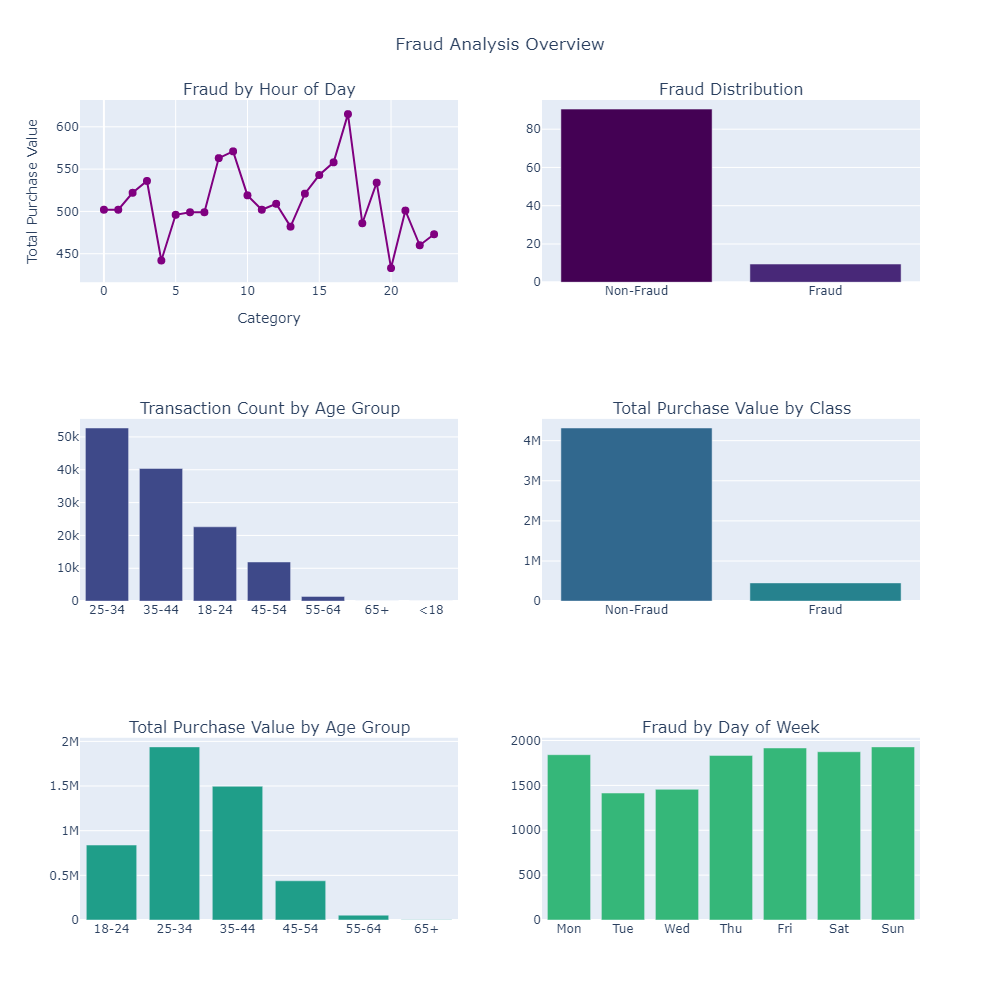

In [42]:
#  Display the saved image
Image(filename='../Visual/analyzing_fraud_patterns.png')

In [43]:
columns_to_drop = [
    "user_id",
    "signup_time",
    "ip_address_int",
    "purchase_time",
    "ip_address",
    "device_id",
    "source",
    "browser",
    "age",
    "device_browser_combination",
    "country_source_combination"
]

fraud_data_with_country.drop(columns=columns_to_drop, inplace=True)

In [44]:
fraud_data_with_country.dropna(inplace = True)

In [45]:
fraud_data_with_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129146 entries, 0 to 129145
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   purchase_value             129146 non-null  int64   
 1   sex                        129146 non-null  object  
 2   class                      129146 non-null  int64   
 3   country                    129146 non-null  object  
 4   signup_time_hour           129146 non-null  int32   
 5   signup_time_day            129146 non-null  int32   
 6   signup_time_year           129146 non-null  int32   
 7   signup_time_month          129146 non-null  int32   
 8   purchase_time_hour         129146 non-null  int32   
 9   purchase_time_day          129146 non-null  int32   
 10  purchase_time_year         129146 non-null  int32   
 11  purchase_time_month        129146 non-null  int32   
 12  transaction_count          129146 non-null  int64   
 13  user_activity_

In [46]:
# Normalize and scale numeric features using StandardScaler
numeric_cols = fraud_data_with_country.select_dtypes(include=['int64', 'float64', 'int32']).columns
numeric_cols = [col for col in numeric_cols if col != 'class']
# std_scaler = StandardScaler()
rob_scaler = RobustScaler()

fraud_data_with_country[numeric_cols] = rob_scaler.fit_transform(fraud_data_with_country[numeric_cols])


In [47]:
# Encode categorical features using One-Hot Encoding with sparse output
categorical_cols = fraud_data_with_country.select_dtypes(include=['object', 'category']).columns
categorical_cols = [col for col in categorical_cols if col != 'class']
ohe = OneHotEncoder(sparse_output=True)  # Keep it sparse
ohe_data = ohe.fit_transform(fraud_data_with_country[categorical_cols])
ohe_df = pd.DataFrame.sparse.from_spmatrix(ohe_data, columns=ohe.get_feature_names_out(categorical_cols))

# Combine the encoded features with the original DataFrame and drop original categorical columns
fraud_data_with_country_concat = pd.concat([fraud_data_with_country, ohe_df], axis=1)
fraud_data_with_country_final = fraud_data_with_country_concat.drop(categorical_cols, axis=1)

In [48]:
fraud_data_with_country_final.sample(5)

,purchase_value,class,signup_time_hour,signup_time_day,signup_time_year,signup_time_month,purchase_time_hour,purchase_time_day,purchase_time_year,purchase_time_month,...,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,age_group_18-24,age_group_25-34,age_group_35-44,age_group_45-54,age_group_55-64,age_group_65+
100308,1.000000,0,-0.363636,-0.75,0.0,0.50,1.000000,-0.75,0.0,1.00,...,0,0,0,0,0,0,1.0,0,0,0
28760,-0.222222,0,0.818182,-0.25,0.0,0.00,0.636364,-0.50,0.0,0.25,...,0,0,0,0,0,0,1.0,0,0,0
119386,-0.666667,0,-0.909091,-0.50,0.0,0.75,1.000000,0.00,0.0,1.00,...,0,0,0,0,0,0,0,1.0,0,0
98106,0.666667,1,0.636364,-0.75,0.0,-0.75,0.636364,-0.75,0.0,-1.25,...,0,0,0,0,0,0,0,1.0,0,0
95102,0.000000,0,0.000000,0.75,0.0,0.25,-0.545455,0.25,0.0,0.00,...,0,0,0,0,0,1.0,0,0,0,0


## Encoding credit card

In [49]:
# RobustScaler is less prone to outliers.
credit_card['scaled_amount'] = rob_scaler.fit_transform(credit_card['Amount'].values.reshape(-1,1))
credit_card['scaled_time'] = rob_scaler.fit_transform(credit_card['Time'].values.reshape(-1,1))

credit_card.drop(['Time','Amount'], axis=1, inplace=True)

In [50]:
scaled_amount = credit_card['scaled_amount']
scaled_time = credit_card['scaled_time']

credit_card.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
credit_card.insert(0, 'scaled_amount', scaled_amount)
credit_card.insert(1, 'scaled_time', scaled_time)

credit_card_final = credit_card.copy()
# Amount and Time are Scaled!

credit_card_final.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [51]:
fraud_data_with_country.columns

Index(['purchase_value', 'sex', 'class', 'country', 'signup_time_hour',
       'signup_time_day', 'signup_time_year', 'signup_time_month',
       'purchase_time_hour', 'purchase_time_day', 'purchase_time_year',
       'purchase_time_month', 'transaction_count', 'user_activity_period_days',
       'transaction_velocity', 'avg_purchase', 'time_to_purchase',
       'seconds_since_signup', 'quick_purchase', 'age_group'],
      dtype='object')

In [52]:
# Save preprocessed data 
fraud_data_with_country_final.to_csv('../data/cleaned/fraud_data_preprocessed.csv', index=False)
credit_card_final.to_csv('../data/cleaned/creditcard_preprocessed.csv', index=False)